# Tabulky (DataFrame)

In [1]:
import numpy as np
import pandas as pd
pd.DataFrame?

Základní datový typ, který Pandas nabízí, je `DataFrame`, neboli lidově „tabulka”. 
V příkladech se často pojmenována zkráceně jako `df`.
Jednotlivé záznamy jsou v ní uvedeny jako řádky a části těchto záznamů jsou úhledně srovnány ve sloupcích.

Nejpoužívanější způsob, jak naplnit první DataFrame, je načtení ze souboru. Na to má Pandas sadu funkcí začínající `read_`.
(Některé z nich potřebují další knihovny, viz dokumentace.)

Jeden z nejpříjemnějších formátů je CSV:

In [ ]:
actors = pd.read_csv('static/actors.csv', index_col=None)
actors

Případně lze tabulku vytvořit ze seznamu seznamů:

In [ ]:
items = pd.DataFrame([
    ["Book", 123],
    ["Computer", 2185],
])
items

nebo seznamu slovníků:

In [ ]:
items = pd.DataFrame([
    {"name": "Book", "price": 123},
    {"name": "Computer", "price": 2185},
])
items

nebo taky

In [ ]:
items = pd.DataFrame({
    "name": ["Book", "Computer"],
    "price": [123, 2185]
})
items

Další možností je pospojovat několik Series. 
Později si ukážeme jak k existujícímu DataFrame připojit Series jako nový sloupec.
Teď si ukážeme jak Series poskládat jako řádky:

In [ ]:
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
purchase = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
purchase.head()

V Jupyter Notebooku se tabulka vykreslí „graficky”.
V konzoli se vypíše textově, ale data v ní jsou stejná:

In [ ]:
print(actors)

Základní informace o tabulce se dají získat metodou `info`:

In [ ]:
actors.info()

Vidíme, že je to tabulka (`DataFrame`), má 6 řádků indexovaných (pomocí automaticky vygenerovaného indexu) od 0 do 5 a 3 sloupce: jeden s objekty, jeden s `int64` a jeden s `bool`.

Tyto datové typy (`dtypes`) se doplnily automaticky podle zadaných hodnot. Pandas je používá hlavně pro šetření pamětí: pythonní objekt typu `bool` zabírá v paměti desítky bytů, ale v `bool` sloupci si každá hodnota vystačí s jedním bytem.

Na rozdíl od NumPy jsou typy dynamické: když do sloupce zapíšeme „nekompatibilní” hodnotu, kterou Pandas neumí převést na daný typ, typ sloupce se automaticky zobecní.
Některé automatické převody ovšem nemusí být úplně intuitivní, např. `None` na `NaN`.

> #### Příklad:
> Načtěte data se statistikami získaných medailí v olympijských hrách
> Význam sloupců je:
>
> - **index**: název státu
> - **# Summer**: kolik letních her se stát zúčastnil
> - **Gold.S**, **Silver.S**, **Bronze.S**: Počty medailí v letních hrách
> - **# Winter**: kolika zimních her se stát zúčastnil
> - **Gold.W**, **Silver.W**, **Bronze.W****, Počty medailí v zimních hrách
> - **ID**: identifikátor státu

In [16]:
# Řesení
olymp = pd.read_excel('static/olympics.xlsx')
olymp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, Afghanistan to Mixed team
Data columns (total 9 columns):
# Summer    146 non-null int64
Gold.S      146 non-null int64
Silver.S    146 non-null int64
Bronze.S    146 non-null int64
# Winter    146 non-null int64
Gold.W      146 non-null int64
Silver.W    146 non-null int64
Bronze.W    146 non-null int64
ID          146 non-null object
dtypes: int64(8), object(1)
memory usage: 10.3+ KB


---

## Výběr prvků
Prvky ze sloupců jdou vybírat jako u seznamů. 
Ale z tabulek v Pandas jde vybírat spoustou různých způsobů. 
Tradiční hranaté závorky plní několik funkcí najednou, takže někdy není na první pohled jasné, co jaké indexování znamená:

In [ ]:
actors['name']  # Jméno sloupce

In [ ]:
actors[1:-1]  # Interval řádků

In [ ]:
actors[['name', 'alive']]  # Seznam sloupců

Toto je příklad nejednoznačného chování, které zjednodušuje život datovým analytikům, pro které je knihovna Pandas primárně určena.

> #### Příklad:
> Z tabulky olympijských her vyberte jen sloupce s počty her a vytvořte z nich nový DataFrame.

In [ ]:
# Řesení
select = ['# Summer', '# Winter']
olymp[select].head()

---

My, coby programátoři píšící robustní kód, budeme čisté indexování (`[]`) používat *jen* pro výběr sloupců podle jména.
Pro ostatní přístup použijeme tzv. *indexery*, jako `loc` a `iloc`.

### Výběr podle masky
Stejně jako u Serie, můžeme i u Dataframe vybárat podle masky.

In [ ]:
birth_years = actors['birth']
mask = birth_years > 1940
actors.where(mask).notna()

nebo zkráceně

In [ ]:
actors[actors['birth'] > 1940]

> #### Příklad:
> Z tabulky olympijských her vyberte jen ty země, které získaly alespoň jednu zlatou medaili.

In [ ]:
# Řesení
sw = olymp[(olymp['Gold.S'] == 0 ) & (olymp['Gold.W'] == 0 ) ]
sw

> zjistěte které státy získali více zlatých medailí v zimních hrách než v letních hrách.

In [ ]:
# Řesení
sw = olymp[(olymp['Gold.S'] >= (olymp['Silver.S'] + olymp['Bronze.S']))]
sw

---

### Přidání Series do DataFrame
Přes hranaté závorky můžeme do DataFrame i přidávat Series jako další sloupce.

In [ ]:
ages = 2018 - actors['birth']
actors['ages'] = ages
actors


> #### Příklad:
> Z tabulky olympijských her přidejte tři nové sloupce
>
> - **Total.S**: se součtem všech medaili z letních her
> - **Total.W**: se součtem všech medaili ze zimních her
> - **# Games**: se počtem kolika letních i zimních her se stát zúčastnil.

In [17]:
# Řesení
olymp['Total.S'] = olymp['Gold.S'] + olymp['Silver.S'] + olymp['Bronze.S']
olymp['Total.W'] = olymp['Gold.W'] + olymp['Silver.W'] + olymp['Bronze.W']
olymp['# Games'] = olymp['# Summer'] + olymp['# Winter']
olymp.head()

# Summer  Gold.S  Silver.S  Bronze.S  # Winter  Gold.W  Silver.W  \
Afghanistan        13       0         0         2         0       0         0   
Algeria            12       5         2         8         3       0         0   
Argentina          23      18        24        28        18       0         0   
Armenia             5       1         2         9         6       0         0   
Australasia         2       3         4         5         0       0         0   

             Bronze.W   ID  Total.S  Total.W  # Games  
Afghanistan         0  AFG        2        0       13  
Algeria             0  ALG       15        0       15  
Argentina           0  ARG       70        0       41  
Armenia             0  ARM       12        0       11  
Australasia         0  ANZ       12        0        2

---

## Osy DataFrame
DataFrame má dvě osy:

![](media/axis.jpg)

### Prohození os
Pomocí `.T` získáme transponovaný DataFrame. 
Podívejte nejprve si připomeňme DataFrame `purchase`:

In [ ]:
purchase

Vypsání transponovaného DataFrame

In [ ]:
purchase.T

## Mazání z DaraFrame
V Pandas operace nemění (až na několik výjimek) původní DataFrame.

Pokud například chceme z DataFrame odstranit nějaká data, můžeme tak udělat pomocí metody `drop`

In [ ]:
purchase.drop('Store 1')

Pokud si ale znovu zobrazíme obsah `df`, obsahuje stále všechny řádky.

In [ ]:
purchase

V takovém případě musíme výsledek přiřadit do proměnné

In [ ]:
purchase = purchase.drop('Store 1')
purchase

Stejného efektu je možné docílit i jinak. 
Podívejte se na nápovědu.
Rovněž se zkuste zamyslet, jak by jste smazali sloupec.

In [ ]:
purchase.drop?

> #### Příklad:
> V načtené tabulce olympijských statistik je několik záznamů pro "nestáty".
> Najděte je odstraňte z tabulky.

In [ ]:
df = pd.read_excel('static/olympics.xlsx')
df.drop(['Mixed team', 'Independent Olympic Participants'])

---

Pokud chceme uvolnit celý DataFrame z paměti pak použijeme operátor `del`

## Přejmenování aprocházení sloupec po sloupci
Sloupce (ale i indexy) je možné přejmenovat pomocí metody `rename`

In [2]:
actors = pd.read_csv('static/actors.csv')
prevodnik = {
    'name': 'nAme',
    'alive': 'death'
}
actors.rename(columns=prevodnik)

nAme  birth  death
0    Terry   1942   True
1  Michael   1943   True
2     Eric   1943   True
3   Graham   1941  False
4    Terry   1940   True
5     John   1939   True

In [3]:
for col in actors.columns:
    print(col, type(col))

name <class 'str'>
birth <class 'str'>
alive <class 'str'>


In [4]:
actors[['birth', 'alive', 'name']]

birth  alive     name
0   1942   True    Terry
1   1943   True  Michael
2   1943   True     Eric
3   1941  False   Graham
4   1940   True    Terry
5   1939   True     John

## Indexer `loc`
Indexer `loc` zprostředkovává primárně *řádky*, a to podle *indexu*, tedy hlaviček tabulky. 
V našem příkladu jsou řádky očíslované a sloupce pojmenované, ale dále uvidíme, že v obou indexech můžou být jakékoli hodnoty.

In [5]:
actors

name  birth  alive
0    Terry   1942   True
1  Michael   1943   True
2     Eric   1943   True
3   Graham   1941  False
4    Terry   1940   True
5     John   1939   True

In [6]:
actors.loc[2]

name     Eric
birth    1943
alive    True
Name: 2, dtype: object

Všimněte si, že `loc` není metoda: používají se s ním hranaté závorky.

Použijeme-li k indexování *n*-tici, prvním prvkem se indexují řádky a druhým sloupce – podobně jako u NumPy:

In [7]:
actors.loc[2, 'birth']

1943

Na obou pozicích může být „interval”, ale na rozdíl od klasického Pythonu jsou ve výsledku obsaženy *obě koncové hodnoty*. (S indexem, který nemusí být vždy číselný, to dává smysl.)

In [8]:
actors.loc[2:4, 'birth':'alive']

birth  alive
2   1943   True
3   1941  False
4   1940   True

Když uvedeme jen jednu hodnotu, sníží se dimenzionalita – z tabulky na sloupec (případně řádek – taky Series), ze sloupce na skalární hodnotu. Porovnejte:

In [11]:
type(actors.loc[2:4, 'name'])

pandas.core.series.Series

In [12]:
type(actors.loc[2:4, 'name':'name'])

pandas.core.frame.DataFrame

Chcete-li vybrat sloupec, na místě řádků uveďte dvojtečku – t.j. kompletní interval.

In [13]:
actors.loc[:, 'alive']

0     True
1     True
2     True
3    False
4     True
5     True
Name: alive, dtype: bool

Další možnost indexování je seznamem hodnot. Tím se dají řádky či sloupce vybírat, přeskupovat, nebo i duplikovat:

In [14]:
actors.loc[:, ['name', 'alive']]

name  alive
0    Terry   True
1  Michael   True
2     Eric   True
3   Graham  False
4    Terry   True
5     John   True

In [15]:
actors.loc[[3, 2, 4, 4], :]

name  birth  alive
3  Graham   1941  False
2    Eric   1943   True
4   Terry   1940   True
4   Terry   1940   True

> #### Příklad:
> Z tabulky olympijských her vyberte Českou republiku, Slovensko a další dva státy podle své volby a jako sloupce jen zlaté medaile.

In [25]:
# Řesení
olymp.loc[['Czech Republic', 'Slovakia', 'Austria', 'Czechoslovakia'], ['Gold.S', 'Gold.W']]

Gold.S  Gold.W
Czech Republic      14       7
Slovakia             7       2
Austria             18      59
Czechoslovakia      49       2

---

## Indexer `iloc`
Druhý indexer, který si v krátkosti ukážeme, je `iloc`. Umí to samé co `loc`, jen nepracuje s klíčem, ale s pozicemi řádků či sloupců. Funguje tedy jako indexování v NumPy.

In [26]:
actors

name  birth  alive
0    Terry   1942   True
1  Michael   1943   True
2     Eric   1943   True
3   Graham   1941  False
4    Terry   1940   True
5     John   1939   True

In [27]:
actors.iloc[0, 0]

'Terry'

Protože `iloc` pracuje s čísly, záporná čísla a intervaly fungují jako ve standardním Pythonu:

In [28]:
actors.iloc[-1, 1]

1939

In [29]:
actors.iloc[:, 0:1]

name
0    Terry
1  Michael
2     Eric
3   Graham
4    Terry
5     John

Indexování seznamem ale funguje jako u `loc`:

In [30]:
actors.iloc[[0, -1, 3], [-1, 1, 0]]

alive  birth    name
0   True   1942   Terry
5   True   1939    John
3  False   1941  Graham

Jak `loc` tak `iloc` fungují i na sloupcích (Series), takže se dají kombinovat:

In [33]:
actors.iloc[-1].loc['name']

'John'

> #### Příklad:
> Z tabulky olympijských her vyberte deset států, kteří se zúčastnili nejvíce her.

In [40]:
olymp.sort_values(by="# Games", ascending=False).iloc[:10]

# Summer  Gold.S  Silver.S  Bronze.S  # Winter  Gold.W  \
Great Britain        27     236       272       272        22      10   
Switzerland          27      47        73        65        22      50   
France               27     202       223       246        22      31   
Austria              26      18        33        35        22      59   
Sweden               26     143       164       176        22      50   
United States        26     976       757       666        22      96   
Italy                26     198       166       185        22      37   
Hungary              25     167       144       165        22       0   
Canada               25      59        99       121        22      62   
Norway               24      56        49        43        22     118   

               Silver.W  Bronze.W   ID  Total.S  Total.W  # Games  
Great Britain         4        12  GBR      780       26       49  
Switzerland          40        48  SUI      185      138       49  
France               31        47  FRA      671      109       49  
Austria              78        81  AUT       86      218       48  
Sweden               40        54  SWE      483      144       48  
United States       102        84  USA     2399      282       48  
Italy                34        43  ITA      549      114       48  
Hungary               2         4  HUN      476        6       47  
Canada               56        52  CAN      279      170       47  
Norway              111       100  NOR      148      329       46

---

## Indexy
V minulé sekci jsme naťukli indexy – jména jednotlivých sloupců nebo řádků. 
Teď se podívejme, co všechno s nimi lze dělat.
Načtěte si znovu stejnou tabulku:

In [41]:
actors = pd.read_csv('static/actors.csv')
actors

name  birth  alive
0    Terry   1942   True
1  Michael   1943   True
2     Eric   1943   True
3   Graham   1941  False
4    Terry   1940   True
5     John   1939   True

Tato tabulka klíč `index`.

In [42]:
actors.index

RangeIndex(start=0, stop=6, step=1)

Klíč se dá změnit tím, že do něj přiřadíme sloupec (nebo jinou sekvenci):

In [44]:
actors.index = actors['name']
actors

name  birth  alive
name                          
Terry      Terry   1942   True
Michael  Michael   1943   True
Eric        Eric   1943   True
Graham    Graham   1941  False
Terry      Terry   1940   True
John        John   1939   True

In [45]:
actors.index

Index(['Terry', 'Michael', 'Eric', 'Graham', 'Terry', 'John'], dtype='object', name='name')

Potom jde pomocí tohoto klíče vyhledávat. 
Chceme-li vyhledávat efektivně (což dává smysl, pokud by řádků byly miliony), je dobré nejdřív tabulku podle indexu seřadit:

In [46]:
actors = actors.sort_index()
actors

name  birth  alive
name                          
Eric        Eric   1943   True
Graham    Graham   1941  False
John        John   1939   True
Michael  Michael   1943   True
Terry      Terry   1942   True
Terry      Terry   1940   True

In [47]:
actors.loc[['Eric', 'Graham']]

name  birth  alive
name                        
Eric      Eric   1943   True
Graham  Graham   1941  False

Pozor ale na situaci, kdy hodnoty v klíči nejsou unikátní. To Pandas podporuje, ale chování nemusí být podle vašich představ:

In [48]:
actors.loc['Terry']

name  birth  alive
name                      
Terry  Terry   1942   True
Terry  Terry   1940   True

Trochu pokročilejší možnost, jak klíč nastavit, je metoda `set_index`. 
Nejčastěji se používá k přesunutí sloupců do klíče, ale v [dokumentaci](http://pd.pydata.org/pandas-docs/stable/generated/pd.DataFrame.set_index.html) se dočtete i o dalších možnostech.
Přesuňte teď do klíče dva sloupce najednou:

In [50]:
indexed_actors = actors.set_index(['name', 'birth'])
indexed_actors

alive
name    birth       
Eric    1943    True
Graham  1941   False
John    1939    True
Michael 1943    True
Terry   1942    True
        1940    True

Vznikl tím víceúrovňový klíč:

In [51]:
indexed_actors.index

MultiIndex(levels=[['Eric', 'Graham', 'John', 'Michael', 'Terry'], [1939, 1940, 1941, 1942, 1943]],
           labels=[[0, 1, 2, 3, 4, 4], [4, 2, 0, 4, 3, 1]],
           names=['name', 'birth'])

Řádky z tabulky s víceúrovňovým klíčem se dají vybírat buď postupně po jednotlivých úrovních, nebo *n*-ticí:

In [52]:
indexed_actors.loc['Terry']

alive
birth       
1942    True
1940    True

In [53]:
indexed_actors.loc['Terry'].loc[1940]

alive    True
Name: 1940, dtype: bool

In [54]:
indexed_actors.loc[('Terry', 1942)]

alive    True
Name: (Terry, 1942), dtype: bool

Kromě výběru dat mají klíče i jinou vlastnost: přidáme-li do tabulky nový sloupec s klíčem, jednotlivé řádky se seřadí podle něj:

In [58]:
indexed_actors

alive
name    birth       
Eric    1943    True
Graham  1941   False
John    1939    True
Michael 1943    True
Terry   1942    True
        1940    True

In [59]:
last_names = pd.Series(['Gilliam', 'Jones', 'Cleveland'],
                           index=[('Terry', 1940), ('Terry', 1942), ('Carol', 1942)])
last_names

(Terry, 1940)      Gilliam
(Terry, 1942)        Jones
(Carol, 1942)    Cleveland
dtype: object

In [60]:
indexed_actors['last_name'] = last_names
indexed_actors

alive last_name
name    birth                 
Eric    1943    True       NaN
Graham  1941   False       NaN
John    1939    True       NaN
Michael 1943    True       NaN
Terry   1942    True     Jones
        1940    True   Gilliam

> #### Příklad:
> Tabulku olympýjschýh přeindexujte podle ID státu.

In [64]:
olymp.index

Index(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australasia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       ...
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Virgin Islands',
       'Yugoslavia', 'Independent Olympic Participants', 'Zambia', 'Zimbabwe',
       'Mixed team'],
      dtype='object', length=146)

---

## NaN neboli NULL či N/A

V posledním příkladu vidíme, že Pandas doplňuje za neznámé hodnoty `NaN`, tedy "Not a Number" – hodnotu, která plní podobnou funkci jako `NULL` v SQL nebo `None` v Pythonu. Znamená, že daná informace chybí, není k dispozici nebo ani nedává smysl ji mít. 
Naprostá většina operací s `NaN` dává opět `NaN`:

In [ ]:
'(' + indexed_actors['last_name'] + ')'

NaN se chová divně i při porovnávání; `(NaN == NaN)` je nepravda. 
Pro zjištění chybějících hodnot máme metodu `isnull()`:

In [69]:
indexed_actors['last_name'].isnull()

name     birth
Eric     1943      True
Graham   1941      True
John     1939      True
Michael  1943      True
Terry    1942     False
         1940     False
Name: last_name, dtype: bool

Abychom se `NaN` zbavili, máme dvě možnosti. 
Buď je zaplníme pomocí metody [`fillna`](http://pd.pydata.org/pandas-docs/stable/generated/pd.DataFrame.fillna.html) hodnotou jako `0`, `False` nebo, pro přehlednější výpis, prázdným řetězcem:

In [70]:
indexed_actors.fillna('')

alive last_name
name    birth                 
Eric    1943    True          
Graham  1941   False          
John    1939    True          
Michael 1943    True          
Terry   1942    True     Jones
        1940    True   Gilliam

Nebo se můžeme zbavit všech řádků, které nějaký `NaN` obsahují:

In [71]:
indexed_actors.dropna()

alive last_name
name  birth                 
Terry 1942    True     Jones
      1940    True   Gilliam

Bohužel existuje jistá nekonzistence mezi `NaN` a slovy `null` či `na` v názvech funkcí. *C'est la vie.*

> #### Příklad:
> Zjistěte který stát má největší rozdíl v počtu získaných medailí mezi letními a zímními hrami:
>
> $$\frac{Summer~Gold - Winter~Gold}{Total~Gold}$$
>

In [ ]:
# Řesení

---

## Merge

Někdy se stane, že máme více souvisejících tabulek, které je potřeba spojit dohromady. Na to mají `DataFrame` metodu `merge()`, která umí podobné operace jako `JOIN` v SQL.

In [72]:
actors = pd.read_csv('static/actors.csv', index_col=None)
actors

name  birth  alive
0    Terry   1942   True
1  Michael   1943   True
2     Eric   1943   True
3   Graham   1941  False
4    Terry   1940   True
5     John   1939   True

In [73]:
spouses = pd.read_csv('static/spouses.csv', index_col=None)
spouses

name  birth         spouse_name
0    Graham   1941      David Sherlock
1      John   1939        Connie Booth
2      John   1939    Barbara Trentham
3      John   1939  Alyce Eichelberger
4      John   1939       Jennifer Wade
5     Terry   1940        Maggie Westo
6      Eric   1943          Lyn Ashley
7      Eric   1943      Tania Kosevich
8     Terry   1942       Alison Telfer
9     Terry   1942     Anna Söderström
10  Michael   1943       Helen Gibbins

In [74]:
actors.merge(spouses)

name  birth  alive         spouse_name
0     Terry   1942   True       Alison Telfer
1     Terry   1942   True     Anna Söderström
2   Michael   1943   True       Helen Gibbins
3      Eric   1943   True          Lyn Ashley
4      Eric   1943   True      Tania Kosevich
5    Graham   1941  False      David Sherlock
6     Terry   1940   True        Maggie Westo
7      John   1939   True        Connie Booth
8      John   1939   True    Barbara Trentham
9      John   1939   True  Alyce Eichelberger
10     John   1939   True       Jennifer Wade

Další možností je použít `merge` přímo v knihovně `pd`

### Příklad:

In [75]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


Existují 4 zůzné druhy `merge`, stejně jako v sql

#### outer

In [76]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Kelly  Director of HR          NaN
Mike              NaN          Law
Sally  Course liasion  Engineering

#### inner

In [77]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

Role       School
Name                              
Sally  Course liasion  Engineering
James          Grader     Business

#### left

In [78]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

Role       School
Name                              
Kelly  Director of HR          NaN
Sally  Course liasion  Engineering
James          Grader     Business

#### right

In [79]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Mike              NaN          Law
Sally  Course liasion  Engineering

Mají-li spojované tabulky sloupce stejných jmen, Pandas je spojí podle těchto sloupců. 
V [dokumentaci](http://pd.pydata.org/pandas-docs/stable/generated/pd.DataFrame.merge.html) se dá zjistit, jak explicitně určit podle kterých klíčů spojovat, co udělat když v jedné z tabulek chybí odpovídající hodnoty apod.

Fanoušky SQL ještě odkážu na [porovnání mezi SQL a Pandas](http://pd.pydata.org/pandas-docs/stable/comparison_with_sql.html).

> #### Příklad:
> Nyní se pokusíme zjistit, který národ je sportovně nejnadanější.
> Tedy kolik získal medailí na jednoho svého obyvatele za jedny hry.
>
> Z wikipedie si táhněte pomocí příkazu `pd.read_html` tabulku států
> 
> - [Seznam států světa podle počtu obyvatel](https://cs.wikipedia.org/wiki/Seznam_st%C3%A1t%C5%AF_sv%C4%9Bta_podle_po%C4%8Dtu_obyvatel)
> 
> 1. Tuto tabulku spojte s tabulkou získaných medailí na z Olympijských her.

In [82]:
# Řesení
pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")[0]

0                                                 1           2  \
0    Rank                   Country(or dependent territory)  Population   
1       1                                     China[Note 2]  1395810000   
2       2                                     India[Note 3]  1341030000   
3       3                             United States[Note 4]   328371000   
4       4                                         Indonesia   265015300   
5       5                                            Brazil   209998000   
6       6                                          Pakistan   203049000   
7       7                                           Nigeria   193392517   
8       8                                        Bangladesh   165728000   
9       9                                    Russia[Note 5]   146877088   
10     10                                             Japan   126450000   
11     11                                            Mexico   119938473   
12     12                                          Ethiopia   107534882   
13     13                                       Philippines   106927000   
14     14                                             Egypt    98048400   
15     15                                           Vietnam    94660000   
16     16                                          DR Congo    84004989   
17     17                                           Germany    82887000   
18     18                                              Iran    82048800   
19     19                                            Turkey    80810525   
20     20                                          Thailand    69183173   
21     21                                    France[Note 6]    67372000   
22     22                            United Kingdom[Note 7]    66040229   
23     23                                             Italy    60398794   
24     24                                      South Africa    57725600   
25     25                                  Tanzania[Note 8]    54199163   
26     26                                           Myanmar    53862731   
27     27                                       South Korea    51635256   
28     28                                             Kenya    50950879   
29     29                                          Colombia    49464683   
..    ...                                               ...         ...   
211   188                             Saint Kitts and Nevis       55850   
212   189                                  Marshall Islands       55500   
213     –                            South Ossetia[Note 22]       53532   
214     –                           Faroe Islands (Denmark)       51237   
215     –                        Sint Maarten (Netherlands)       39410   
216   190                                            Monaco       38300   
217   191                                     Liechtenstein       38201   
218     –                     Turks and Caicos Islands (UK)       37910   
219     –                             Saint-Martin (France)       36457   
220     –                                    Gibraltar (UK)       33573   
221   192                                        San Marino       33344   
222     –                       British Virgin Islands (UK)       31719   
223   193                                             Palau       17900   
224     –                                 Cook Islands (NZ)       15200   
225     –                                     Anguilla (UK)       15045   
226     –                        Wallis and Futuna (France)       11700   
227   194                                             Nauru       11000   
228   195                                            Tuvalu       10200   
229     –                         Saint Barthélemy (France)        9417   
230     –                Saint Pierre and Miquelon (France)        6286   
231     –  Saint Helena, Ascensionand Tristan da Cunha (UK)        5633   
232     –                        

> 2. Z tabulky odstraňte všechny státy, které se začernili méně než deseti her.

In [ ]:
# Řesení

> 3. Ze zbylých států zjistěte, kolik medailí získají průměrně na jednu olympiádu.

In [ ]:
# Řesení

> 4. Vypočítejte poměr mezi počtem obyvatel a počtem získaných medailí na jednu hru.

In [ ]:
# Řesení

> 5. Vypište deset nejúspěšnějších států

In [ ]:
# Řesení

> 6. Zjistěte (programově) kde se v tomto žebříčku nachází Česká republika

In [ ]:
# Řesení

---

## Groupby

Často používaná operace pro zjednodušení tabulky je `groupby`, která sloučí dohromady řádky se stejnou hodnotou v některém sloupci a sloučená data nějak agreguje.

In [87]:
import itertools
import random
random.seed(0)

months = pd.date_range('2015-01', '2016-12', freq='M')
categories = ['Electronics', 'Power Tools', 'Clothing']
data = pd.DataFrame([{'month': a, 'category': b, 'sales': random.randint(-1000, 10000)}
                          for a, b in itertools.product(months, categories)
                          if random.randrange(20) > 0])

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
category    67 non-null object
month       67 non-null datetime64[ns]
sales       67 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


Samotný výsledek `groupby()` je jen objekt:

In [85]:
data.groupby('category')

... na který musíme zavolat příslušnou agregující funkci. Tady je například součet částek podle kategorie:

In [86]:
data.groupby('category').sum()

sales
category           
Clothing     112701
Electronics  103742
Power Tools  104859

Nebo počet záznamů:

In [88]:
data.groupby('category').count()

month  sales
category                 
Clothing        22     22
Electronics     22     22
Power Tools     23     23

Groupby umí agregovat podle více sloupců najednou (i když u našeho příkladu nedává velký smysl):

In [89]:
data.groupby(['category', 'month']).sum().head()

sales
category month            
Clothing 2015-01-31   6961
         2015-02-28   2578
         2015-03-31   9131
         2015-04-30    618
         2015-05-31   4796

Chceme-li aplikovat více funkcí najednou, předáme jejich seznam metodě `agg`. Časté funkce lze předat jen jménem, jinak předáme funkci či metodu přímo:

In [90]:
data.groupby('category').agg(['mean', 'median', sum, pd.Series.kurtosis])

sales                          
                    mean  median     sum      kurt
category                                          
Clothing     5122.772727  6185.5  112701 -1.298035
Electronics  4715.545455  4294.5  103742 -1.353210
Power Tools  4559.086957  3769.0  104859 -1.044767

Případně použijeme zkratku pro základní analýzu:

In [91]:
g = data.groupby('month')
g.describe()

sales                                                            \
           count         mean          std     min     25%     50%     75%   
month                                                                        
2015-01-31   3.0  5364.333333  1914.414880  3242.0  4566.0  5890.0  6425.5   
2015-02-28   3.0  3804.333333  1152.853995  2578.0  3273.5  3969.0  4417.5   
2015-03-31   3.0  3900.333333  4529.891978  1281.0  1285.0  1289.0  5210.0   
2015-04-30   3.0  3250.000000  3895.490855   618.0  1012.5  1407.0  4566.0   
2015-05-31   3.0  5792.000000  2069.341200  4409.0  4602.5  4796.0  6483.5   
2015-06-30   3.0  7241.333333  2747.220656  4180.0  6116.0  8052.0  8772.0   
2015-07-31   3.0  5836.333333  2388.415653  3267.0  4760.0  6253.0  7121.0   
2015-08-31   1.0  5534.000000          NaN  5534.0  5534.0  5534.0  5534.0   
2015-09-30   3.0  3371.000000  3542.417960    31.0  1513.5  2996.0  5041.0   
2015-10-31   3.0  6367.666667  3002.029702  2909.0  5402.5  7896.0  8097.0   
2015-11-30   3.0  3917.666667  3273.148688   494.0  2368.5  4243.0  5629.5   
2015-12-31   3.0  5225.333333  2377.587082  3769.0  3853.5  3938.0  5953.5   
2016-01-31   3.0  8453.666667   536.431108  7852.0  8239.5  8627.0  8754.5   
2016-02-29   3.0  6417.666667  2290.170372  4194.0  5242.0  6290.0  7529.5   
2016-03-31   3.0  2345.666667   537.738164  2012.0  2035.5  2059.0  2512.5   
2016-04-30   3.0  5439.000000  4444.797408   471.0  3639.0  6807.0  7923.0   
2016-05-31   3.0  2391.333333  2675.235566   314.0   882.0  1450.0  3430.0   
2016-06-30   3.0  5012.000000  3178.877632  2858.0  3186.5  3515.0  6089.0   
2016-07-31   3.0  8232.000000  1732.765131  6382.0  7439.5  8497.0  9157.0   
2016-08-31   3.0  5452.333333  4539.188621   349.0  3659.0  6969.0  8004.0   
2016-09-30   3.0  3569.333333  5183.962802  -735.0   692.0  2119.0  5721.5   
2016-10-31   3.0  3487.333333  2247.644174   919.0  2683.5  4448.0  4771.5   
2016-11-30   3.0   385.333333   887.008643  -259.0  -120.5    18.0   707.5   

                    
               max  
month               
2015-01-31  6961.0  
2015-02-28  4866.0  
2015-03-31  9131.0  
2015-04-30  7725.0  
2015-05-31  8171.0  
2015-06-30  9492.0  
2015-07-31  7989.0  
2015-08-31  5534.0  
2015-09-30  7086.0  
2015-10-31  8298.0  
2015-11-30  7016.0  
2015-12-31  7969.0  
2016-01-31  8882.0  
2016-02-29  8769.0  
2016-03-31  2966.0  
2016-04-30  9039.0  
2016-05-31  5410.0  
2016-06-30  8663.0  
2016-07-31  9817.0  
2016-08-31  9039.0  
2016-09-30  9324.0  
2016-10-31  5095.0  
2016-11-30  1397.0

A perlička nakonec – agregovat se dá i podle sloupců, které nejsou v tabulce. Následující kód rozloží data na slabé, průměrné a silné měsíce podle toho, kolik jsme v daném měsíci vydělali celých tisícikorun, a zjistí celkový zisk ze slabých, průměrných a silných měsíců:

In [104]:
bin_size = 10000
by_month = data.groupby('month').sum()
by_thousands = by_month.groupby(by_month['sales'] // bin_size * bin_size).agg(['sum', 'count'])
%matplotlib inline
#by_thousands.plot.pie(subplots=True)

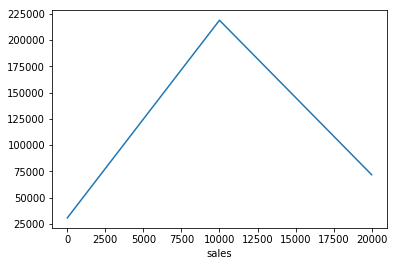

In [105]:
%matplotlib inline
by_thousands[('sales', 'sum')].plot()

## Pivot table
Z databáze a různých datových uložit můžeme často získat rozměrné tabulky ve sloupcovém zápisu.
To znamená, že tyto tabulky můžou mít dva sloupce jako id-čka a třetí sloupec(e) pro data.
Takové uspořádání je pro datovou analýzu nevhodné a proto je často nutné takto načtenou tabulku nejdříve transformovat.

Načtěte následující tabulku:

In [106]:
df = pd.read_csv('cars.csv')
df.head()

FileNotFoundError: File b'cars.csv' does not exist

Z této tabulky nás zajímají sloupce: **YEAR**, **Make** a **(kW)**.
Představte si, že chce zjistit jak silná auta vyráběli automobilky v různých letech.
Tedy potřebujete tabulku, kde jsou na jedné ose roky a na druhé automobilky a která je vyplněna průměrnou hodnotou sil jejich motorů.

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)